In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 #computer vision

In [ ]:
#image import, digitalization
image1=cv2.imread("/content/test1.jpg", cv2.IMREAD_GRAYSCALE)
image2=cv2.imread("/content/test2.jpg",cv2.IMREAD_GRAYSCALE)

In [ ]:
image1.shape, image2.shape

((3024, 3024), (1280, 1280))

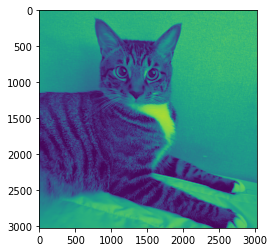

In [ ]:
plt.imshow(image1)

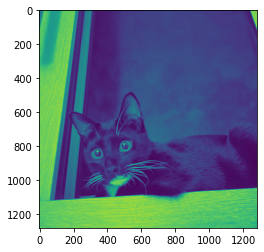

In [ ]:
plt.imshow(image2)

In [ ]:
image2

array([[115, 114, 112, ..., 215, 214, 211],
       [115, 114, 112, ..., 214, 215, 212],
       [115, 114, 112, ..., 214, 215, 213],
       ...,
       [195, 195, 194, ..., 158, 159, 160],
       [192, 192, 191, ..., 153, 156, 159],
       [190, 189, 188, ..., 151, 156, 161]], dtype=uint8)

In [ ]:
image2

array([[115, 114, 112, ..., 215, 214, 211],
       [115, 114, 112, ..., 214, 215, 212],
       [115, 114, 112, ..., 214, 215, 213],
       ...,
       [195, 195, 194, ..., 158, 159, 160],
       [192, 192, 191, ..., 153, 156, 159],
       [190, 189, 188, ..., 151, 156, 161]], dtype=uint8)

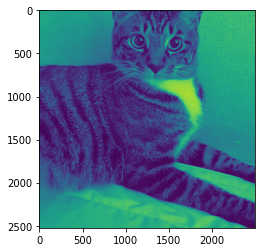

In [ ]:
image1_rev=image1[500:,0:2500]
plt.imshow(image1_rev)

In [ ]:
image1_rev.shape

(2500, 2500)

In [ ]:
image1.shape, image2.shape

((3024, 3024), (1280, 1280))

In [ ]:
#image resizing
image1_re=cv2.resize(image1,(1280,1280))
image1_re.shape

(1280, 1280)

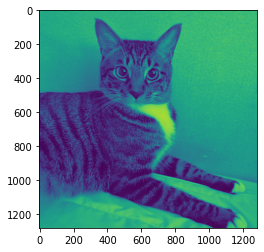

In [ ]:
plt.imshow(image1_re)

In [ ]:
#image flatten
image1_f=image1_re.reshape(-1,1280*1280)
image2_f=image2.reshape(-1,1280*1280)

In [ ]:
image1_f.shape, image2_f.shape

((1, 1638400), (1, 1638400))

In [ ]:
image1_f

array([[  0,   0,   0, ..., 161, 162, 162]], dtype=uint8)

In [ ]:
target=[1,0]
target=np.array(target)
target

array([1, 0])

In [ ]:
data=np.zeros((2,1638400))
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data[0]=image1_f
data[1]=image2_f

In [ ]:
data

array([[  0.,   0.,   0., ..., 161., 162., 162.],
       [115., 114., 112., ..., 151., 156., 161.]])

In [ ]:
data_label=np.column_stack((data,target))
data_label

array([[  0.,   0.,   0., ..., 162., 162.,   1.],
       [115., 114., 112., ..., 156., 161.,   0.]])

In [ ]:
data_label.shape

(2, 1638401)

In [ ]:
#image database
data_saved=pd.DataFrame(data_label,columns=np.arange(0,1638401))
data_saved.to_csv("data.csv")
data_saved

,0,1,2,3,4,5,6,7,8,9,...,1638391,1638392,1638393,1638394,1638395,1638396,1638397,1638398,1638399,1638400
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,160.0,161.0,161.0,161.0,161.0,161.0,161.0,162.0,162.0,1.0
1,115.0,114.0,112.0,110.0,109.0,107.0,105.0,102.0,99.0,99.0,...,153.0,151.0,148.0,146.0,147.0,149.0,151.0,156.0,161.0,0.0


In [ ]:
input=data_saved[np.arange(0,1638400)]
input

,0,1,2,3,4,5,6,7,8,9,...,1638390,1638391,1638392,1638393,1638394,1638395,1638396,1638397,1638398,1638399
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,160.0,160.0,161.0,161.0,161.0,161.0,161.0,161.0,162.0,162.0
1,115.0,114.0,112.0,110.0,109.0,107.0,105.0,102.0,99.0,99.0,...,154.0,153.0,151.0,148.0,146.0,147.0,149.0,151.0,156.0,161.0


In [ ]:
output=data_saved[1638400]
output

0    1.0
1    0.0
Name: 1638400, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(input,output)